
## ALL



## Hong Real Gen

* Gen new data with real model

tensor([[2054.3281,  633.9849,   32.9984]])

tensor([[2468.8032, 1781.9651,  110.9102]])


## Web application (NOT deployed yet)

Run interactively on the web at: 




## Inputs



(2, 'i_h2i_rate')

(3, 'i_pci_rate')

(5, 'i_ngi_rate')

(6, 'i_o2_volfract')

(8, 'i_h2_temp')

(9, 'i_hbtemp')

(10, 'i_wind_rt')


## Outputs


* desired output requirements 


(27, 'o_tgt')

(29, 'o_hmt')

(39, 'o_prod_rt')

(40, 'o_fta')



In [1]:

## !pip install xgboost
## !pip install onnxmltools
## !pip install onnxruntime
## !pip install pandas
## !pip install scikit-learn
## !pip install matplotlib
## !pip install seaborn
## !pip install mlxtend
## ! pip install skl2onnx



In [2]:


import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import functorch


import torch.optim as optim


from numpy.random import normal
from scipy.stats import norm
import scipy.stats as stats
from numpy import hstack
from numpy import vstack
from numpy import exp
from sklearn.neighbors import KernelDensity

##from typing import Optional

from torch import Tensor


from torch.utils.data import TensorDataset, DataLoader

from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

import os, json, time, uuid


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





In [3]:


import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import onnxmltools
from onnxmltools.convert.xgboost.operator_converters.XGBoost import (
    convert_xgboost)
from onnxmltools.convert import convert_xgboost as convert_xgboost_booster


from zipfile import ZipFile
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn, to_onnx, update_registered_converter
from skl2onnx.common.shape_calculator import (
    calculate_linear_classifier_output_shapes,
    calculate_linear_regressor_output_shapes)


# Import the ONNX runtime environment
import onnxruntime as rt




In [4]:

import PDFshapingUtils as PDF_tk


In [5]:

PDFshapingOBJ = PDF_tk.PDFshapingUtils()


In [6]:


PDFshapingOBJ.N_error_range = 5         ## 20
PDFshapingOBJ.mean_impulse  = 0.0       ## -7.0      ## 0.0
PDFshapingOBJ.std_impulse   = 0.001     ## 1.0
PDFshapingOBJ.kde_std       = 0.5       ## 0.1       ## 0.5      ## 3.0  ## smaller is better approximation?
PDFshapingOBJ.bandwidth     = 0.2       ## 0.2->more jagged, 2.0->more smooth


In [7]:

PDFshapingOBJ.initializeImpulseGaussian()


In [8]:

PDFshapingOBJ.read_csv_file_with_pandas('CFD.16.2025.csv')


In [9]:

PDFshapingOBJ.CFD_raw_data


,index,case name,i_h2i_rate,i_pci_rate,i_wpi_rate,i_ngi_rate,i_o2_volfract,i_ng_temp,i_h2_temp,i_hbtemp,...,o_h2o_sollos,o_feo_sollos,o_hm_rt,o_mw_rt,o_wf_rt,o_hm_h2share,o_mw_h2share,o_wf_h2share,o_prod_rt,o_fta
0,1,H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HB...,0,0,0,120,21,300,0,1200,...,20.0,44.9,122.0,264.0,687.0,31.6,26.7,63.5,4050.0,1800.0
1,2,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,18.5,52.6,122.0,265.0,684.0,27.9,23.4,60.6,4060.0,1850.0
2,3,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.6,50.9,123.0,266.0,690.0,27.7,23.5,60.8,4080.0,1850.0
3,4,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.2,124.0,268.0,690.0,27.7,23.2,60.6,4090.0,1850.0
4,5,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.4,124.0,268.0,695.0,27.7,23.2,60.7,4110.0,1850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4995,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,18.7,40.3,353.0,763.0,2190.0,34.0,20.5,56.7,11700.0,2380.0
4995,4996,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,18.7,40.7,353.0,763.0,2190.0,33.8,20.4,56.8,11700.0,2310.0
4996,4997,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,19.2,37.5,353.0,763.0,2230.0,33.6,20.4,57.1,11700.0,2380.0
4997,4998,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,17.6,39.8,355.0,768.0,2220.0,34.0,20.0,55.7,11800.0,2310.0


In [10]:

PDFshapingOBJ.print_headers_list()


['index', 'case name', 'i_h2i_rate', 'i_pci_rate', 'i_wpi_rate', 'i_ngi_rate', 'i_o2_volfract', 'i_ng_temp', 'i_h2_temp', 'i_hbtemp', 'i_wind_rt', 'i_blastH2O', 'i_BdnH2O', 'i_sgi_rate', 'i_sgtemp', 'i_sgi_H2COratio', 'i_sgi_ReProRatio', 'o_tuy_velo', 'o_tuy_temp', 'o_burn', 'o_delp', 'o_co_vf', 'o_co2_vf', 'o_h2_vf', 'o_n2_vf', 'o_co_util', 'o_h2_util', 'o_tgt', 'o_coke_rt', 'o_hmt', 'o_co2_sollos', 'o_h2o_sollos', 'o_feo_sollos', 'o_hm_rt', 'o_mw_rt', 'o_wf_rt', 'o_hm_h2share', 'o_mw_h2share', 'o_wf_h2share', 'o_prod_rt', 'o_fta']
41
(0, 'index')
(1, 'case name')
(2, 'i_h2i_rate')
(3, 'i_pci_rate')
(4, 'i_wpi_rate')
(5, 'i_ngi_rate')
(6, 'i_o2_volfract')
(7, 'i_ng_temp')
(8, 'i_h2_temp')
(9, 'i_hbtemp')
(10, 'i_wind_rt')
(11, 'i_blastH2O')
(12, 'i_BdnH2O')
(13, 'i_sgi_rate')
(14, 'i_sgtemp')
(15, 'i_sgi_H2COratio')
(16, 'i_sgi_ReProRatio')
(17, 'o_tuy_velo')
(18, 'o_tuy_temp')
(19, 'o_burn')
(20, 'o_delp')
(21, 'o_co_vf')
(22, 'o_co2_vf')
(23, 'o_h2_vf')
(24, 'o_n2_vf')
(25, 'o_co_ut

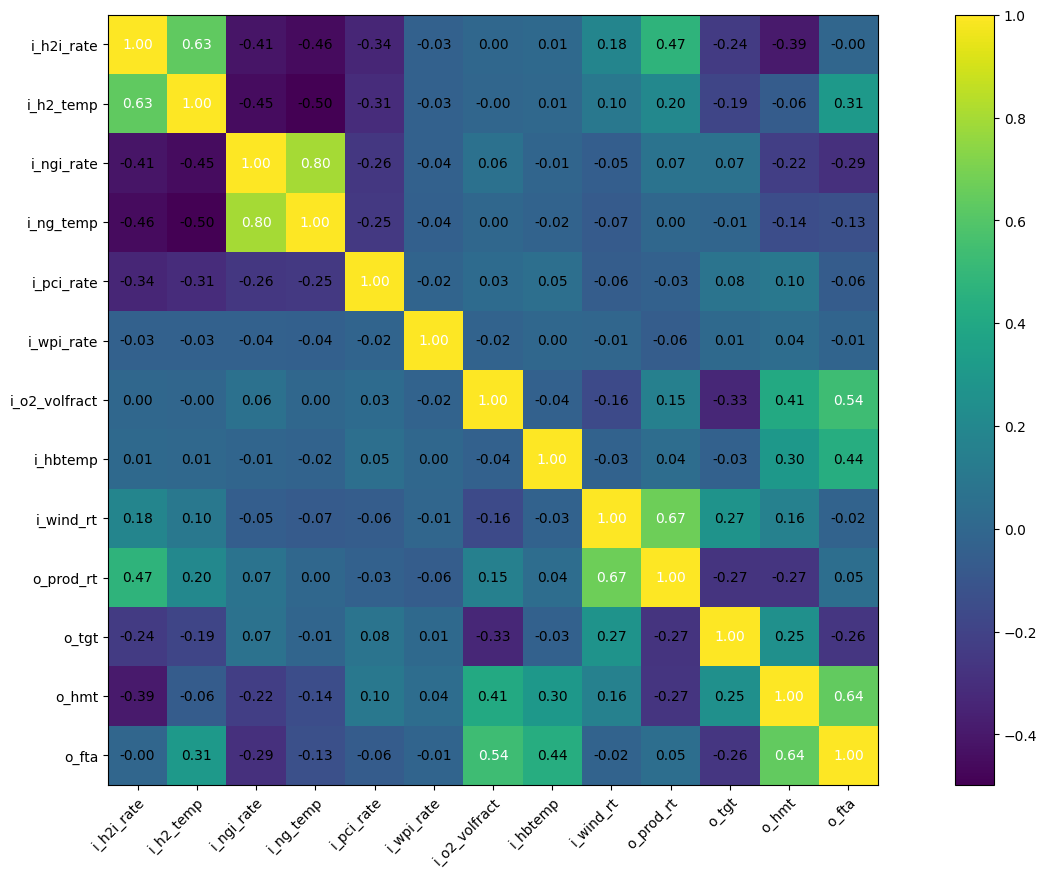

In [11]:


PDFshapingOBJ.list_of_selected_column_names = ['i_h2i_rate','i_h2_temp','i_ngi_rate','i_ng_temp','i_pci_rate',
                    'i_wpi_rate','i_o2_volfract',
                    'i_hbtemp','i_wind_rt','o_prod_rt', 'o_tgt', 'o_hmt','o_fta']



PDFshapingOBJ.print_correlation_coefficients()


In [12]:

PDFshapingOBJ.convert_pd_data_to_numpy()


[[1
  'H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-7_SGI-0_SGT-0_SGC_0 '
  0 ... 63.5 4050.0 1800.0]
 [2
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-1_SGI-0_SGT-0_SGC_0 '
  0 ... 60.6 4060.0 1850.0]
 [3
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  0 ... 60.8 4080.0 1850.0]
 ...
 [4997
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1600_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 57.1 11700.0 2380.0]
 [4998
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-3_SGI-0_SGT-0_SGC_0 '
  30 ... 55.7 11800.0 2310.0]
 [4999
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 56.2 11800.0 2310.0]]
(4999, 41)


In [13]:

PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs = [  2, 3, 5, 6, 8, 9, 10   ] , 
                   outputs= [ 27, 29, 39, 40 ]   
)


## inputs = [ 2, 3, 5, 6, 8, 9, 10  ]          ## the full 7



7
4


In [14]:

print(PDFshapingOBJ.X.shape)
print(PDFshapingOBJ.y.shape)


(4999, 7)
(4999, 4)


In [15]:

PDFshapingOBJ.random_seed = int( random.random() * 100  )         ## defautl is 42


In [16]:

PDFshapingOBJ.split_np_data_train_test(selected_test_size=0.2)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [17]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [18]:

from sklearn.decomposition import PCA

# Instantiate PCA to reduce to 4 components
pca = PCA(n_components=4)

# Fit on training data and transform both train and test
X_train_pca = pca.fit_transform(PDFshapingOBJ.X_train)
X_test_pca  = pca.transform(PDFshapingOBJ.X_test)

# Replace the original inputs with PCA-reduced versions
PDFshapingOBJ.X_train = X_train_pca
PDFshapingOBJ.X_test  = X_test_pca





In [19]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 4)
(1000, 4)
(3999, 4)
(1000, 4)


In [20]:

PDFshapingOBJ.convert_dataset_from_np_to_torch()


In [21]:

PDFshapingOBJ.standardize_X_scales()
PDFshapingOBJ.standardize_y_scales()


In [22]:


PDFshapingOBJ.gen_Dataloader_train()

PDFshapingOBJ.train_dl



## Model Forward ( 7x4 )


In [23]:


#############################################################
##   F1      plus       F2
## Linear     +      Nonlinear

class F1plusF2_SIO_Forward(nn.Module):
    ## initialize the layers
    def __init__(self, x_means, x_deviations, y_means, y_deviations,  device='cuda'):
        super().__init__()
        self.device = device
        
        ## self.x_means      = x_means
        ## self.x_deviations = x_deviations
        ## self.y_means      = y_means
        ## self.y_deviations = y_deviations
        
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)
        
        
        
        ## F1
        self.f1_linear1 = nn.Linear(7, 4)       
        
        ## F2
        self.f2_linear1 = nn.Linear(7, 10)
        self.f2_act1    = nn.Sigmoid()                    ## Tanh()                       
        self.f2_linear2 = nn.Linear(10, 4)       
        self.f2_dropout = nn.Dropout(0.25)
        
        # Move model to device
        self.to(self.device)
        
        
    ## perform inference
    def forward(self, x):
        x = x.to(self.device)
        x = (x - self.x_means) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear1(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_dropout(f2)
        f2 = self.f2_linear2(f2)
        
        
        y_scaled   = f1 + f2
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    




In [24]:

n_inputs  = 4     ## 7
n_outputs = 4





    
class ResidualNet_Forward(nn.Module):
    def __init__(self, x_means, x_deviations, y_means, y_deviations, dropout_rate=0.1, device='cuda'):
        
        super().__init__()
        self.device = device
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)

     
        self.fc1  = nn.Linear(n_inputs, 64)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(64, 64)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(64, n_outputs)

        # If input_dim ≠ 64, project for residual addition
        self.input_proj = nn.Linear(n_inputs, 64) if n_inputs != 64 else nn.Identity()
        
        # Move model to device
        self.to(self.device)
        

    def forward(self, x):
        x  = x.to(self.device)
        x  = (x - self.x_means) / self.x_deviations
        x0 = self.input_proj(x)
        x1 = self.dropout1(self.act1(self.fc1(x)))
        x2 = self.dropout2(self.act2(self.fc2(x1)))
        x_res = x2 + x0
        y_scaled = self.fc3(x_res)
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    

    


In [25]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## model_Forward     = F1plusF2_SIO_Forward(

model_Forward     =     ResidualNet_Forward(
                         PDFshapingOBJ.x_means, 
                         PDFshapingOBJ.x_deviations, 
                         PDFshapingOBJ.y_means, 
                         PDFshapingOBJ.y_deviations,
                         device=device  # pass device into the model
    
)

optimizer = optim.Adam(model_Forward.parameters(), lr=0.001)
loss_fn   = nn.MSELoss()



In [26]:

model_Forward.train()

for epoch in range(1000):
    for xb, yb in PDFshapingOBJ.train_dl:
        
        xb = xb.to(model_Forward.device)
        yb = yb.to(model_Forward.device)
        
        optimizer.zero_grad()
        pred_descaled, pred_scaled = model_Forward(xb)
        loss = loss_fn(pred_scaled, yb)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(epoch, ".....", loss.item() ) 
    



0 ..... 0.5763112306594849
100 ..... 0.410856693983078
200 ..... 0.502143144607544
300 ..... 0.3515792191028595
400 ..... 0.5151312351226807
500 ..... 0.6113086342811584
600 ..... 0.2818257808685303
700 ..... 0.3923998773097992
800 ..... 0.7533084154129028
900 ..... 0.5983841419219971


In [27]:

print("=== SANITY CHECK: SCALING ===")
print("y_means:", PDFshapingOBJ.y_means)
print("y_deviations:", PDFshapingOBJ.y_deviations)

print("===============================================")

print("x_means:", PDFshapingOBJ.x_means)
print("x_deviations:", PDFshapingOBJ.x_deviations)


=== SANITY CHECK: SCALING ===
y_means: tensor([[  96.7448, 1296.1082, 8448.8125, 2308.4761]])
y_deviations: tensor([[  49.8560,  519.5769, 1502.7363,  210.3308]])
x_means: tensor([[     0.0000,     -0.0000,      0.0000,     -0.0000]])
x_deviations: tensor([[362.4145, 157.1593,  51.6267,  31.3694]])


In [28]:

print(PDFshapingOBJ.y_means -  PDFshapingOBJ.y_deviations)
print(PDFshapingOBJ.y_means +  PDFshapingOBJ.y_deviations)


tensor([[  46.8888,  776.5312, 6946.0762, 2098.1453]])
tensor([[ 146.6008, 1815.6851, 9951.5488, 2518.8069]])



## Generate Data based on forward model trained on just real data



## Constraints Optimization



* desired output requirements
* Raceway flame temp 2600k - 2700K.......... 'o_fta')
* Hot metal temp      1800 - 1830K...........
* Top gas temp         70 - 80C............
* production rate , 39 



In [ ]:


def gen_synthetic_samples_from_RealHong():
  

    sampled_input_dist  = PDFshapingOBJ.sample_input_from_dist_fn()
    

    model_Forward.eval()
    with torch.no_grad():
        
        final_input     = sampled_input_dist
      
        final_output, _ = model_Forward( final_input )

        
    final_input_np     = final_input.cpu().numpy()
    final_output_np    = final_output.cpu().numpy()
    

    os.makedirs("SyntheticCorpus", exist_ok=True)

    
    for i in range(final_input_np.shape[0]):
        
        ####################################################
       
        clamp_min_val   = np.round(final_input_np[i], 3)
        
        final_input_val = np.round(final_input_np[i], 3)
        
        clamp_max_val   = np.round(final_input_np[i], 3)
        
        ####################################################
    
    
        lower_bounds_val = np.round(final_output_np[i], 3)
        
        final_output_val = np.round(final_output_np[i], 3)
        
        upper_bounds_val = np.round(final_output_np[i], 3)
        
        ####################################################
    
        rec = {
            "clamp_min":        clamp_min_val.tolist(),
            "final_input":      final_input_val.tolist(),
            "clamp_max":        clamp_max_val.tolist(),
            "lower_bounds_glob": (lower_bounds_val.tolist()
                              if hasattr(lower_bounds_val, "tolist") else list(lower_bounds_val)),
            "final_output":     final_output_val.tolist(),
            "upper_bounds_glob": (upper_bounds_val.tolist()
                              if hasattr(upper_bounds_val, "tolist") else list(upper_bounds_val)),
        }
        
        fname = f"sample_{time.strftime('%Y%m%d-%H%M%S')}_{uuid.uuid4().hex[:6]}.json"
        with open(os.path.join("SyntheticCorpus", fname), "w", encoding="utf-8") as f:
            json.dump(rec, f, separators=(",", ":"))

    



In [ ]:

## 100

for j in range( 10 ):
    gen_synthetic_samples_from_RealHong()
    print("generated so far: ", (j+1)*32 )


In [ ]:


df_synthetic_data_for_inverse = PDFshapingOBJ.load_synth_folder_to_pandas("SyntheticCorpus", flatten=True)

## df.to_csv("SyntheticCorpus/corpus_flat.csv", index=False) 


In [ ]:

df_synthetic_data_for_inverse 



## Train Inverse model, NOT using Forward-Inverse comparison in loss



## Train Real Gen Inverse Model 

* real data gen

## Web application 

Run interactively on the web at: 



## Outputs


* desired output requirements 


(27, 'o_tgt')

(29, 'o_hmt')

(39, 'o_prod_rt')

(40, 'o_fta')



# Inputs



(2, 'i_h2i_rate')

(3, 'i_pci_rate')

(5, 'i_ngi_rate')

(6, 'i_o2_volfract')

(8, 'i_h2_temp')

(9, 'i_hbtemp')

(10, 'i_wind_rt')




In [ ]:

import PDFshapingUtils as PDF_tk


In [ ]:

PDFshapingOBJ = PDF_tk.PDFshapingUtils()


In [ ]:

PDFshapingOBJ.N_error_range = 5         ## 20
PDFshapingOBJ.mean_impulse  = 0.0       ## -7.0      ## 0.0
PDFshapingOBJ.std_impulse   = 0.001     ## 1.0
PDFshapingOBJ.kde_std       = 0.5       ## 0.1       ## 0.5      ## 3.0  ## smaller is better approximation?
PDFshapingOBJ.bandwidth     = 0.2       ## 0.2->more jagged, 2.0->more smooth


In [ ]:

PDFshapingOBJ.initializeImpulseGaussian()


In [ ]:

## df_synthetic_data_for_inverse = PDFshapingOBJ.load_synth_folder_to_pandas("SyntheticCorpus", flatten=True)


In [ ]:


## PDFshapingOBJ.CFD_raw_data = df_synthetic_data_for_inverse 


In [ ]:

PDFshapingOBJ.read_csv_file_with_pandas('CFD.16.2025.csv')


In [ ]:

PDFshapingOBJ.headers_list = PDFshapingOBJ.CFD_raw_data.columns.values.tolist()


In [ ]:

PDFshapingOBJ.CFD_raw_data


In [ ]:

PDFshapingOBJ.print_headers_list()


In [ ]:


PDFshapingOBJ.convert_pd_data_to_numpy()


In [ ]:

'''

PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs = [ 25, 26, 27, 28 ] ,  
                   outputs= [  7, 8, 9, 10, 11, 12, 13 ]   
)


'''


PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs= [ 27, 29, 39, 40 ]  ,
                   outputs = [ 2, 3, 5, 6, 8, 9, 10  ] 
)


  


In [ ]:


print(PDFshapingOBJ.X.shape)
print(PDFshapingOBJ.y.shape)


In [ ]:

## PDFshapingOBJ.random_seed = int( random.random() * 100  )         ## defautl is 42

PDFshapingOBJ.random_seed = 42


In [ ]:

PDFshapingOBJ.split_np_data_train_test(selected_test_size=0.2)


In [ ]:

PDFshapingOBJ.convert_dataset_from_np_to_torch()


In [ ]:


PDFshapingOBJ.standardize_X_scales()
PDFshapingOBJ.standardize_y_scales()


In [ ]:


PDFshapingOBJ.gen_Dataloader_train()

PDFshapingOBJ.train_dl



In [ ]:


n_inputs  = 4
n_outputs = 7



class ResidualNet_Inverse(nn.Module):
    def __init__(self, x_means, x_deviations, y_means, y_deviations, dropout_rate=0.1, device='cuda'):
        
        super().__init__()
        self.device = device
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)

     
        self.fc1  = nn.Linear(n_inputs, 64)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(64, 64)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(64, n_outputs)

        # If input_dim ≠ 64, project for residual addition
        self.input_proj = nn.Linear(n_inputs, 64) if n_inputs != 64 else nn.Identity()
        
        # Move model to device
        self.to(self.device)
        

    def forward(self, x):
        x  = x.to(self.device)
        x  = (x - self.x_means) / self.x_deviations
        x0 = self.input_proj(x)
        x1 = self.dropout1(self.act1(self.fc1(x)))
        x2 = self.dropout2(self.act2(self.fc2(x1)))
        x_res = x2 + x0
        y_scaled = self.fc3(x_res)
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    



In [ ]:




#############################################################
##   F1      plus       F2
## Linear     +      Nonlinear

class F1plusF2_SIO_Inverse(nn.Module):
    ## initialize the layers
    def __init__(self, x_means, x_deviations, y_means, y_deviations,  device='cuda'):
        super().__init__()
        self.device = device
        
        ## self.x_means      = x_means
        ## self.x_deviations = x_deviations
        ## self.y_means      = y_means
        ## self.y_deviations = y_deviations
        
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)
        
        
        
        ## F1
        self.f1_linear1 = nn.Linear(4, 7)       
        
        ## F2
        self.f2_linear1 = nn.Linear(4, 10)
        self.f2_act1    = nn.Sigmoid()                    ## Tanh()                       
        self.f2_linear2 = nn.Linear(10, 7)       
        self.f2_dropout = nn.Dropout(0.25)
        
        # Move model to device
        self.to(self.device)
        
        
    ## perform inference
    def forward(self, x):
        x = x.to(self.device)
        x = (x - self.x_means) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear1(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_dropout(f2)
        f2 = self.f2_linear2(f2)
        
        
        y_scaled   = f1 + f2
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    




In [ ]:


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## model_Inverse     = F1plusF2_SIO_Inverse(

model_Inverse     =     ResidualNet_Inverse(
                        PDFshapingOBJ.x_means, 
                        PDFshapingOBJ.x_deviations, 
                        PDFshapingOBJ.y_means, 
                        PDFshapingOBJ.y_deviations,
                        device=device  # pass device into the model
    
)

optimizer = optim.Adam(model_Inverse.parameters(), lr=0.001)
loss_fn   = nn.MSELoss()



In [ ]:


## Forward -> 7x4

## Inverse -> 4x7


model_Inverse.train()

for epoch in range(1000):
    for xb, yb in PDFshapingOBJ.train_dl:
        
        xb = xb.to(model_Inverse.device)
        yb = yb.to(model_Inverse.device)
        
        optimizer.zero_grad()
        pred_descaled, pred_scaled = model_Inverse(xb)
        
        
        loss = loss_fn(pred_scaled, yb)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(epoch, ".....", loss.item() ) 
    




In [ ]:


print("=== SANITY CHECK: SCALING ===")
print("y_means:", PDFshapingOBJ.y_means)
print("y_deviations:", PDFshapingOBJ.y_deviations)

print("===============================================")

print("x_means:", PDFshapingOBJ.x_means)
print("x_deviations:", PDFshapingOBJ.x_deviations)




In [ ]:

print( PDFshapingOBJ.X_test_tr[0] )
print( PDFshapingOBJ.y_test_tr[0] )



In [ ]:


print( PDFshapingOBJ.X_test_tr.shape )
print( PDFshapingOBJ.y_test_tr.shape )

with torch.no_grad():
    
    pred_test_descaled, pred_test_scaled = model_Inverse(  PDFshapingOBJ.X_test_tr  )


In [ ]:


y_true = PDFshapingOBJ.y_test_tr.detach().cpu().numpy()

y_pred = pred_test_descaled.detach().cpu().numpy()  # or use descaled pair

mae  = mean_absolute_error(y_true, y_pred, multioutput='raw_values')
rmse = mean_squared_error( y_true, y_pred, squared=False, multioutput='raw_values')
r2   = r2_score(           y_true, y_pred, multioutput='raw_values')

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
print("Overall averages:", 
      mae.mean(), rmse.mean(), r2.mean())



In [ ]:

r2   = r2_score(           y_true, y_pred, multioutput='raw_values')
r2



In [ ]:

r2.mean()



In [ ]:

print('Testing R**2 - descaled:', r2_score( y_pred, y_true   )  )


In [ ]:

print('Testing R**2 - descaled:', r2_score( y_true,  y_pred   )  )


In [ ]:

PDFshapingOBJ.r2_score_torch(PDFshapingOBJ.y_test_tr.to(PDFshapingOBJ.device), pred_test_descaled).mean()


In [ ]:


import torch

# Your trained model
model_Inverse.eval().float()


dummy_input = torch.randn(1, 4, dtype=torch.float32)

# Export to ONNX (single output called "output1")
torch.onnx.export(
    model_Inverse,
    dummy_input,
    "ONNXmodels/F1F2_Inverse_HongRealGen.onnx",
    input_names=["input1"],
    output_names=["output1"],
    opset_version=15,              # fine for onnxruntime-web
    do_constant_folding=True,
    dynamic_axes={
        "input1": {0: "batch"},
        "output1": {0: "batch"}
    }
)
print("ONNX model saved")




## Train Inverse model, YES to using Forward-Inverse comparison in loss


In [ ]:

import PDFshapingUtils as PDF_tk


In [ ]:

PDFshapingOBJ = PDF_tk.PDFshapingUtils()


In [ ]:


PDFshapingOBJ.N_error_range = 5         ## 20
PDFshapingOBJ.mean_impulse  = 0.0       ## -7.0      ## 0.0
PDFshapingOBJ.std_impulse   = 0.001     ## 1.0
PDFshapingOBJ.kde_std       = 0.5       ## 0.1       ## 0.5      ## 3.0  ## smaller is better approximation?
PDFshapingOBJ.bandwidth     = 0.2       ## 0.2->more jagged, 2.0->more smooth



In [ ]:

PDFshapingOBJ.initializeImpulseGaussian()


In [ ]:

## df_synthetic_data_for_inverse = PDFshapingOBJ.load_synth_folder_to_pandas("SyntheticCorpus", flatten=True)

## PDFshapingOBJ.CFD_raw_data = df_synthetic_data_for_inverse 



In [ ]:

PDFshapingOBJ.read_csv_file_with_pandas('CFD.16.2025.csv')


In [ ]:

PDFshapingOBJ.headers_list = PDFshapingOBJ.CFD_raw_data.columns.values.tolist()


In [ ]:

PDFshapingOBJ.CFD_raw_data


In [ ]:

PDFshapingOBJ.print_headers_list()


In [ ]:

PDFshapingOBJ.convert_pd_data_to_numpy()


In [ ]:

'''

PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs = [ 25, 26, 27, 28 ] ,  
                   outputs= [  7, 8, 9, 10, 11, 12, 13 ]   
)

'''




PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs= [ 27, 29, 39, 40 ]  ,
                   outputs = [ 2, 3, 5, 6, 8, 9, 10  ] 
)



In [ ]:


print(PDFshapingOBJ.X.shape)
print(PDFshapingOBJ.y.shape)


In [ ]:

## PDFshapingOBJ.random_seed = int( random.random() * 100  )         ## defautl is 42

PDFshapingOBJ.random_seed = 42


In [ ]:

PDFshapingOBJ.split_np_data_train_test(selected_test_size=0.2)


In [ ]:

PDFshapingOBJ.convert_dataset_from_np_to_torch()


In [ ]:


PDFshapingOBJ.standardize_X_scales()
PDFshapingOBJ.standardize_y_scales()


In [ ]:

PDFshapingOBJ.gen_Dataloader_train()

PDFshapingOBJ.train_dl


In [ ]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## model_Inverse_2     = F1plusF2_SIO_Inverse(

model_Inverse_2     =     ResidualNet_Inverse(
                        PDFshapingOBJ.x_means, 
                        PDFshapingOBJ.x_deviations, 
                        PDFshapingOBJ.y_means, 
                        PDFshapingOBJ.y_deviations,
                        device=device  # pass device into the model
    
)

optimizer = optim.Adam(model_Inverse_2.parameters(), lr=0.001)
loss_fn   = nn.MSELoss()


In [ ]:

## Forward -> 7x4

## Inverse -> 4x7


########################

model_Forward.eval()
for param in model_Forward.parameters():
    param.requires_grad = False


########################


model_Inverse_2.train()

for epoch in range(1000):
    for xb, yb in PDFshapingOBJ.train_dl:
        
        xb = xb.to(model_Inverse_2.device)
        yb = yb.to(model_Inverse_2.device)
        
        optimizer.zero_grad()
        
        ## [7]                                       [4]
        pred_descaled, pred_scaled = model_Inverse_2(xb)
        
        ###########################
        
        ##   [4]                [4]                              [7]
        Fwd_pred_descaled, Fwd_pred_scaled = model_Forward(  pred_descaled   )
        
        FWD_x_means =      PDFshapingOBJ.x_means.to(   model_Inverse_2.device    )
        FWD_y_devs  = PDFshapingOBJ.x_deviations.to(   model_Inverse_2.device    )
        
        xb_scaled_FWD = (xb - FWD_x_means) / FWD_y_devs
       
        ###########################
        
        alpha = 0.1 * max(0, 1 - epoch / 500)

        
        ## alpha = 0.01
        
        loss = (1-alpha) * loss_fn(pred_scaled, yb) + alpha * loss_fn(Fwd_pred_scaled, xb_scaled_FWD)
        
        
        loss.backward()
        optimizer.step()
        
   
        
    if epoch % 100 == 0:
        print(epoch, ".....", loss.item() ) 
        
        ##################################################
        inv_loss = loss_fn(pred_scaled, yb)
        fwd_loss = loss_fn(Fwd_pred_scaled, xb_scaled_FWD)
        print(f"Epoch {epoch} | inv: {inv_loss.item():.4f} | fwd: {fwd_loss.item():.4f}")
        print("===========================================")
        ##################################################
        


In [ ]:


print("=== SANITY CHECK: SCALING ===")
print("y_means:", PDFshapingOBJ.y_means)
print("y_deviations:", PDFshapingOBJ.y_deviations)

print("===============================================")

print("x_means:", PDFshapingOBJ.x_means)
print("x_deviations:", PDFshapingOBJ.x_deviations)


In [ ]:

print( PDFshapingOBJ.X_test_tr[0] )
print( PDFshapingOBJ.y_test_tr[0] )



In [ ]:

print( PDFshapingOBJ.X_test_tr.shape )
print( PDFshapingOBJ.y_test_tr.shape )

with torch.no_grad():
    
    pred_test_descaled, pred_test_scaled = model_Inverse_2(  PDFshapingOBJ.X_test_tr  )


In [ ]:

y_true = PDFshapingOBJ.y_test_tr.detach().cpu().numpy()

y_pred = pred_test_descaled.detach().cpu().numpy()  # or use descaled pair

mae  = mean_absolute_error(y_true, y_pred, multioutput='raw_values')
rmse = mean_squared_error( y_true, y_pred, squared=False, multioutput='raw_values')
r2   = r2_score(           y_true, y_pred, multioutput='raw_values')

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
print("Overall averages:", 
      mae.mean(), rmse.mean(), r2.mean())


In [ ]:

r2   = r2_score(           y_true, y_pred, multioutput='raw_values')
r2


In [ ]:

r2.mean()


In [ ]:

print('Testing R**2 - descaled:', r2_score( y_pred, y_true   )  )


In [ ]:

print('Testing R**2 - descaled:', r2_score( y_true,  y_pred   )  )


In [ ]:

PDFshapingOBJ.r2_score_torch(PDFshapingOBJ.y_test_tr.to(PDFshapingOBJ.device), pred_test_descaled).mean()


In [ ]:


import torch

# Your trained model
model_Forward.eval().float()


dummy_input = torch.randn(1, 7, dtype=torch.float32)

# Export to ONNX (single output called "output1")
torch.onnx.export(
    model_Forward,
    dummy_input,
    "ONNXmodels/LEPINE_model_Forward.onnx",
    input_names=["input1"],
    output_names=["output1"],
    opset_version=15,              # fine for onnxruntime-web
    do_constant_folding=True,
    dynamic_axes={
        "input1": {0: "batch"},
        "output1": {0: "batch"}
    }
)
print("ONNX model saved")




In [ ]:

import torch

# Your trained model
model_Inverse_2.eval().float()


dummy_input = torch.randn(1, 4, dtype=torch.float32)

# Export to ONNX (single output called "output1")

torch.onnx.export(
    model_Inverse_2,
    dummy_input,
    "ONNXmodels/LEPINE_model_Inverse_2.onnx",
    input_names=["input1"],
    output_names=["output1"],
    opset_version=15,              # fine for onnxruntime-web
    do_constant_folding=True,
    dynamic_axes={
        "input1": {0: "batch"},
        "output1": {0: "batch"}
    }
)
print("ONNX model saved")





## XGBoost


In [ ]:

regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)


In [ ]:

regressor.fit(PDFshapingOBJ.X_train, PDFshapingOBJ.y_train)


In [ ]:

print( len(PDFshapingOBJ.X_train  ))
print( len(PDFshapingOBJ.y_train  ))


In [ ]:


print( PDFshapingOBJ.X_train.shape  )
print( PDFshapingOBJ.y_train.shape  )


In [ ]:

y_pred = regressor.predict(PDFshapingOBJ.X_test )


In [ ]:

y_pred


In [ ]:

r2_score( PDFshapingOBJ.y_test, y_pred )



## Is model  invertible ?

* use the Jacobian


In [29]:

import torch
from torch.autograd.functional import jacobian


In [30]:

## x = torch.randn(1, 7, requires_grad=True)

x = torch.randn(      7, requires_grad=True)  # shape [7]

x = torch.randn(      4, requires_grad=True)  # shape [7]


In [31]:

def wrapped_model(x):
    y_descaled, _ = model_Forward(x)
    return y_descaled  # Only return 1 tensor to get a clean Jacobian




In [32]:

## J = jacobian(model_Forward, x)

J = jacobian(wrapped_model, x)


In [33]:

print( len(J) )


1


In [34]:


print( J.shape )  # Should be [1, 4, 7]


torch.Size([1, 4, 4])


In [35]:

u, s, v = torch.svd(J)  


In [36]:

rank = (s > 1e-5).sum()


In [37]:


print("Local Jacobian rank:", rank.item())


Local Jacobian rank: 4


In [38]:

print( PDFshapingOBJ.X_test_tr.shape )
print( PDFshapingOBJ.y_test_tr.shape )


torch.Size([1000, 4])
torch.Size([1000, 4])


In [39]:

def get_jacobian_rank(x_point):
    x_point = x_point.detach().clone().requires_grad_(True)  # shape [7]
    J = jacobian(wrapped_model, x_point)
    u, s, v = torch.svd(J)
    return (s > 1e-5).sum().item()  # Rank


In [40]:



for i in range(1000):
    
    ## x_i = X_data[i]  # shape: [7]
    
    x_i = PDFshapingOBJ.X_test_tr[i]
    
    rank = get_jacobian_rank(x_i)
    
    print(f"Sample {i}: Jacobian rank = {rank}")



Sample 0: Jacobian rank = 4
Sample 1: Jacobian rank = 4
Sample 2: Jacobian rank = 4
Sample 3: Jacobian rank = 4
Sample 4: Jacobian rank = 4
Sample 5: Jacobian rank = 4
Sample 6: Jacobian rank = 4
Sample 7: Jacobian rank = 4
Sample 8: Jacobian rank = 4
Sample 9: Jacobian rank = 4
Sample 10: Jacobian rank = 4
Sample 11: Jacobian rank = 4
Sample 12: Jacobian rank = 4
Sample 13: Jacobian rank = 4
Sample 14: Jacobian rank = 4
Sample 15: Jacobian rank = 4
Sample 16: Jacobian rank = 4
Sample 17: Jacobian rank = 4
Sample 18: Jacobian rank = 4
Sample 19: Jacobian rank = 4
Sample 20: Jacobian rank = 4
Sample 21: Jacobian rank = 4
Sample 22: Jacobian rank = 4
Sample 23: Jacobian rank = 4
Sample 24: Jacobian rank = 4
Sample 25: Jacobian rank = 4
Sample 26: Jacobian rank = 4
Sample 27: Jacobian rank = 4
Sample 28: Jacobian rank = 4
Sample 29: Jacobian rank = 4
Sample 30: Jacobian rank = 4
Sample 31: Jacobian rank = 4
Sample 32: Jacobian rank = 4
Sample 33: Jacobian rank = 4
Sample 34: Jacobian rank


## Condition number


In [43]:


def get_jacobian_info(x_point):
    x_point = x_point.detach().clone().requires_grad_(True)  # shape: [7]
    J = jacobian(wrapped_model, x_point)  # shape: [output_dim, input_dim]

    # Compute rank
    u, s, v = torch.svd(J)
    rank = (s > 1e-5).sum().item()

    # Compute condition number safely
    if s.min().item() < 1e-12:
        cond_number = float('inf')
    else:
        cond_number = s.max().item() / s.min().item()

    return rank, cond_number


condition_numbers = []
# Loop through test samples
for i in range(1000):
    x_i = PDFshapingOBJ.X_test_tr[i]
    rank, cond_number = get_jacobian_info(x_i)
    print(f"Sample {i}: Jacobian rank = {rank}, Condition number = {cond_number:.2e}")
    condition_numbers.append( cond_number)


Sample 0: Jacobian rank = 4, Condition number = 1.30e+04
Sample 1: Jacobian rank = 4, Condition number = 1.21e+04
Sample 2: Jacobian rank = 4, Condition number = 2.78e+03
Sample 3: Jacobian rank = 4, Condition number = 3.61e+03
Sample 4: Jacobian rank = 4, Condition number = 1.76e+04
Sample 5: Jacobian rank = 4, Condition number = 2.86e+03
Sample 6: Jacobian rank = 4, Condition number = 2.78e+04
Sample 7: Jacobian rank = 4, Condition number = 4.50e+04
Sample 8: Jacobian rank = 4, Condition number = 3.03e+04
Sample 9: Jacobian rank = 4, Condition number = 1.39e+03
Sample 10: Jacobian rank = 4, Condition number = 1.12e+03
Sample 11: Jacobian rank = 4, Condition number = 7.19e+02
Sample 12: Jacobian rank = 4, Condition number = 4.55e+03
Sample 13: Jacobian rank = 4, Condition number = 1.24e+05
Sample 14: Jacobian rank = 4, Condition number = 1.89e+04
Sample 15: Jacobian rank = 4, Condition number = 8.95e+02
Sample 16: Jacobian rank = 4, Condition number = 3.20e+04
Sample 17: Jacobian rank

In [51]:

## [0, 999, 9999, 99999, 999999, 9999999, 99999999]


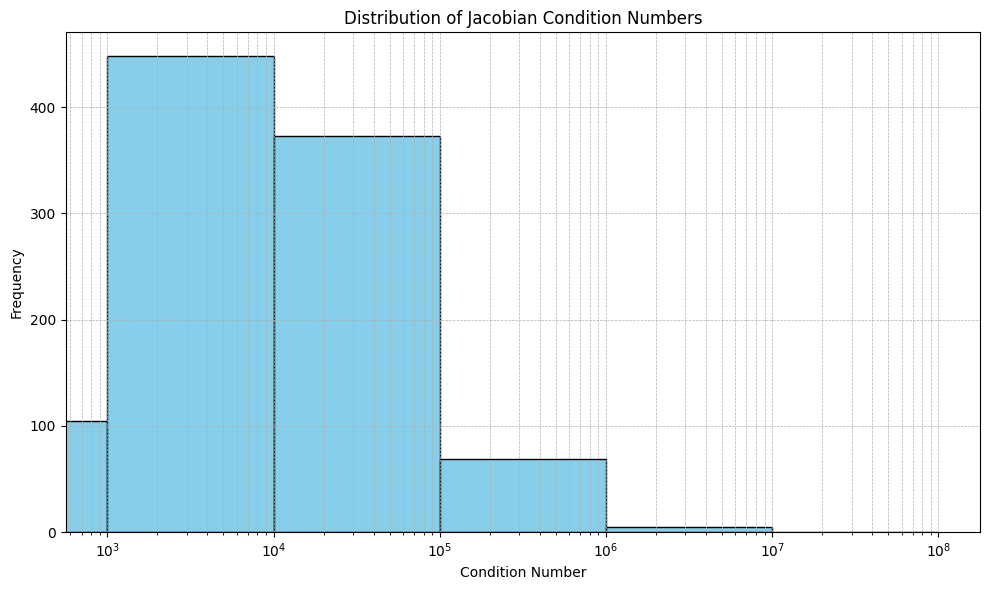

In [52]:



# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(condition_numbers, bins=[0, 999, 9999, 99999, 999999, 9999999, 99999999], 
              color='skyblue', edgecolor='black')
plt.title("Distribution of Jacobian Condition Numbers")
plt.xlabel("Condition Number")
plt.ylabel("Frequency")
plt.xscale("log")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
